### R code
### Salaries analysis


In [ ]:
install.packages("dplyr")
install.packages("ggplot2")
install.packages("tidyverse")
install.packages("corrplot")
install.packages("viridis")
install.packages("scales")



library(dplyr) 
library(ggplot2)
library(tidyverse)
library(corrplot)
library(viridis) 
library(scales)



experience_count <- table(ds_salaries$experience_level)

## Pie chart 1
pie(experience_count, labels = names(experience_count), 
    main = "Distribution of Job Experience Levels", 
    col = rainbow(length(experience_count)),
    cex = 0.6)

ds_salaries %>% 
  count(experience_level)


## 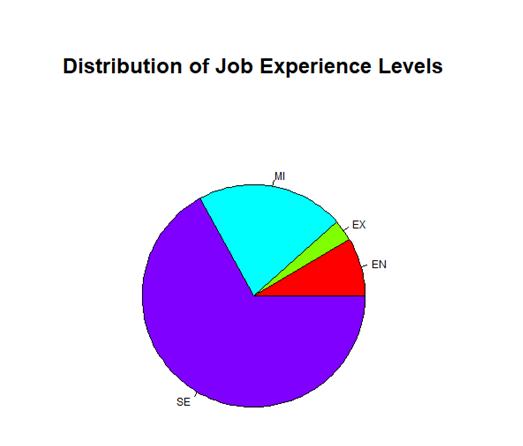
In the dataset majority of employees are Senior level engineers (2516), followed by Mid level (805) then Entry level engineers (320). The least amount of employees are on Executive level (114).

In [ ]:
## Salaries by experience level
ggplot(ds_salaries %>% 
         group_by(experience_level) %>% 
         summarise_at("salary_in_usd",sum),
       aes(experience_level, salary_in_usd, fill=experience_level))+
  geom_bar(stat = "identity")+
  labs(title = "Salary by Experience Level", x = "Experience Level", y = "Salary")+
  scale_y_continuous(labels = comma) 

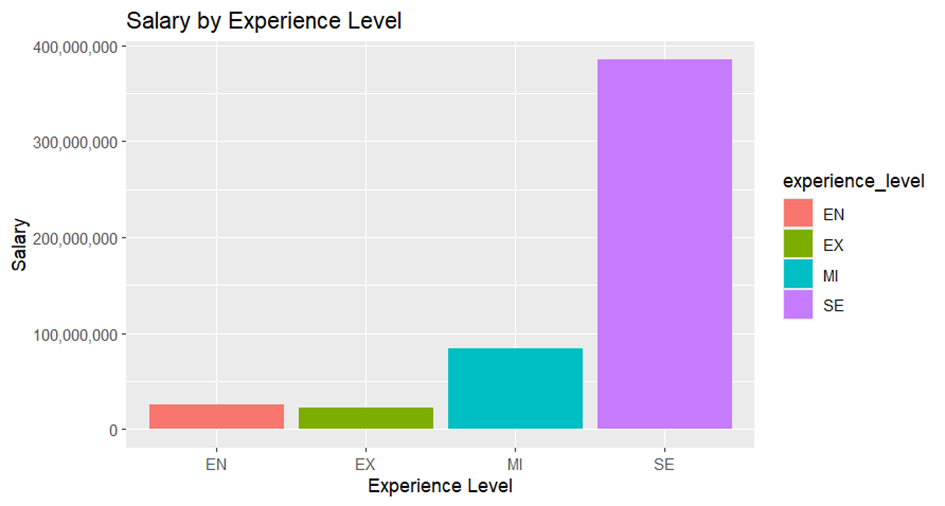

Majority of the salaries in dataset is earned by senior level engineers, followed by mid level. The least amount is earned by executive level employees, with only a slight difference compared to entry level engineers. It's important to note that there are almost three times as many entry level engineers as there are executive level employees.

In [ ]:
## Salary distribution per year
ggplot(ds_salaries %>% 
         group_by(experience_level, work_year) %>% 
         summarise_at("salary_in_usd", sum),
       aes(experience_level, salary_in_usd, fill=experience_level))+
  geom_bar(stat = "identity")+
  labs(title = "Salary per year by Experience Level", x = "Experience Level", y = "Salary (US Dollars)")+
  facet_wrap(~work_year)+
  scale_y_continuous(labels = scales::comma)

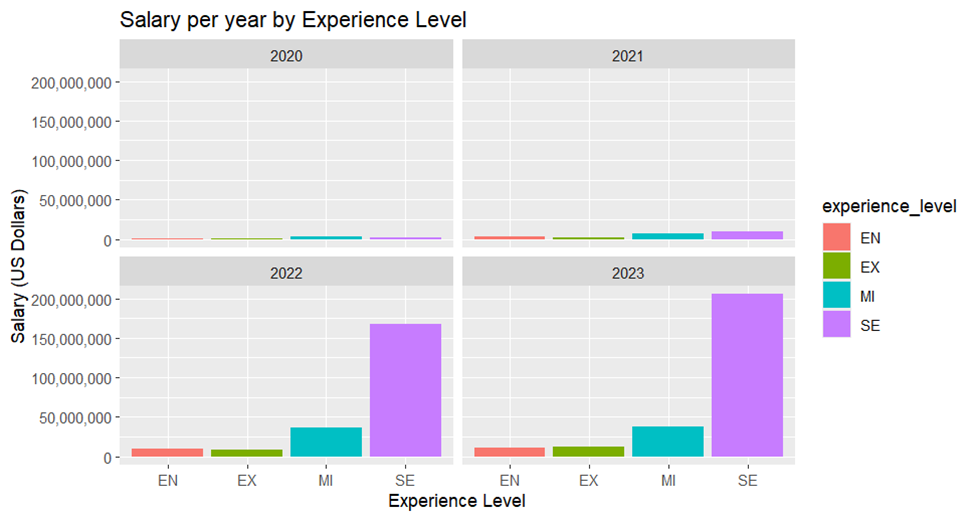

Further examining the distribution of salaries across experience levels by analyzing yearly changes. In the years 2020 and 2021, there is not a significant difference compared to the following year, where we observe a rapid increase in salaries for all four experience levels. The most notable increase is observed in Mid level and Executive level engineers.

In [ ]:
## Salaries by experience level
ggplot(ds_salaries, aes(x = salary_in_usd, fill = experience_level)) +
  geom_histogram(position = "dodge") +
  labs(title = "Salary Distribution Across Experience Levels",
       x = "Salary (USD)",
       y = "Frequency",
       fill = "Experience Level") +
  scale_x_continuous(labels = scales::comma_format())

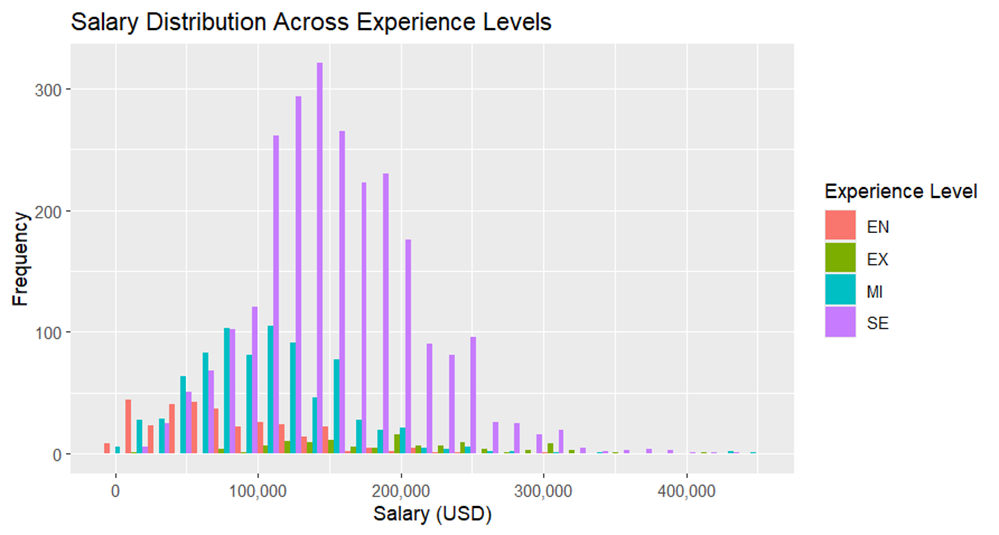

Most common experience level is Senior level, with the majority of engineers earning salaries between 100 000 and 200 000 USD. Mid level engineers typically earn salaries ranging from 50 000 to 150 000 USD. Entry level salaries vary from 10 000 to 150 000 USD. Executive level engineers earn the most common salaries between 100 000 and 300 000 USD.

In [ ]:
## Salaries by company size
ggplot(ds_salaries, aes(company_size,salary_in_usd, color= company_size, fill=company_size))+
  geom_violin()+
  labs(title = "Salary by Company Size", x = "Company Size", y = "Salary in USD")+
  scale_y_continuous(labels = scales::comma)

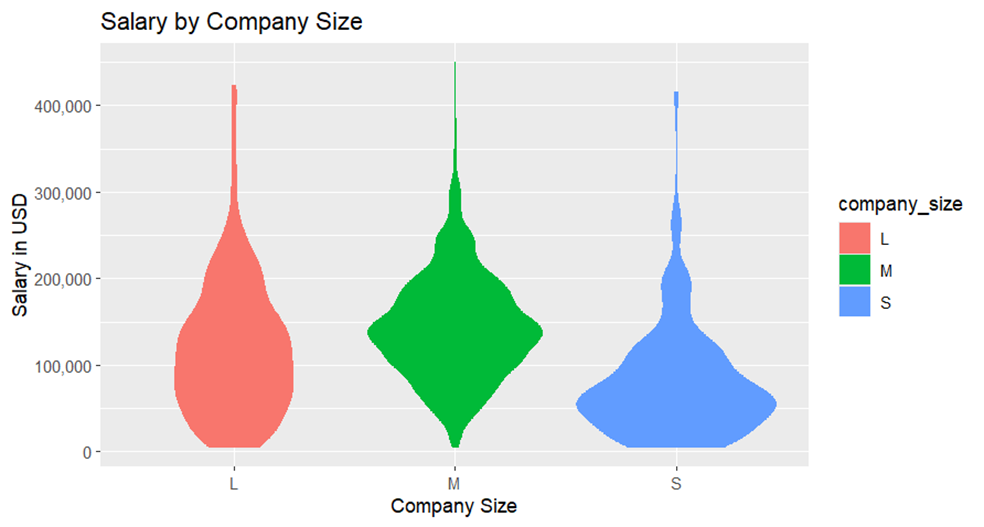

Also examining salary distributions relative to company size. In small sized companies, the most common salary range is up to 100 000 USD. For medium sized companies, salaries are most frequently found in the range of 100 000 to 200 000 USD. In large sized companies, salaries are evenly distributed up to 200 000 USD.

In [ ]:
## Salaries by experience and size
ggplot(ds_salaries, aes(x = experience_level, y = salary_in_usd, fill = company_size)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Salary by Experience Level and Company Size", 
       x = "Experience Level", 
       y = "Salary",
       fill = "Company Size")+
  scale_y_continuous(labels = scales::comma)

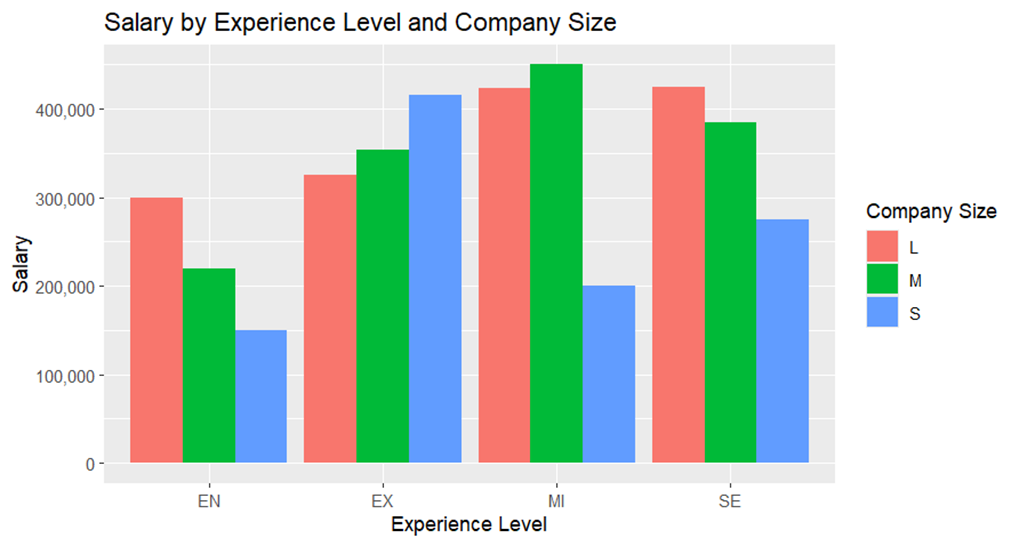

When comparing salaries by experience level and company size, we observe that entry level positions receive the highest salaries in large companies, same pattern also applies to senior-level positions. However, executive level experience is most highly valued in small sized companies, followed by medium sized companies, with the lowest salaries in large companies. Mid level engineers receive nearly equal compensation in large and medium-sized companies, with the highest salaries found in medium sized companies